In [109]:
# load the definitions from the previous notebooks
%run SevenfoldRotation.py

def rotate( v, center=(zero,zero) ) :
    x, y = v
    cx, cy = center
    x -= cx
    y -= cy
    return ( cx + r*x + t*y, cy + s*x + u*y )

def scale( s, v, center=(zero,zero) ) :
    x, y = v
    cx, cy = center
    x -= cx
    y -= cy
    return ( cx + x*s, cy + y*s )

def rotaten( n, v, center=(zero,zero) ):
    for i in range(n):
        v = rotate( v, center )
    return v


Populating the interactive namespace from numpy and matplotlib


(-3.0, 6.0, -2.0, 4.0)

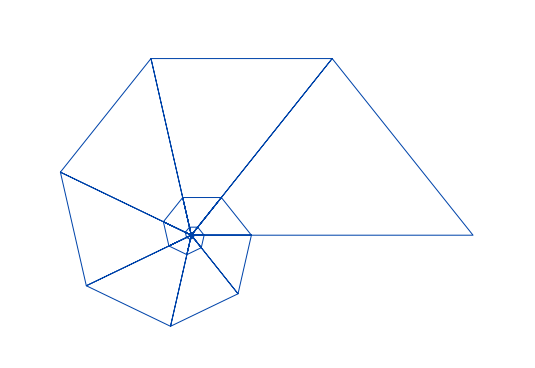

In [110]:
%pylab inline

origin = ( zero, zero )

def nautilus( n ):
    result = []
    def shrink(v):
        return scale( rho_over_sigma, v )
    p1 = ( sigma*sigma, zero )
    p2 = ( rho, rho*rho )
    for i in range(n):
        result .append( origin )
        result .append( p1 )
        result .append( p2 )
        p1 = p2
        p2 = rotate( shrink( p2 ) )
    return result

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.add_patch( drawPolygon( nautilus( 22 ), '#0044aa', skewRender ) )
ax.set_xlim(-3,6)
ax.set_ylim(-2,4)
ax.axis('off')

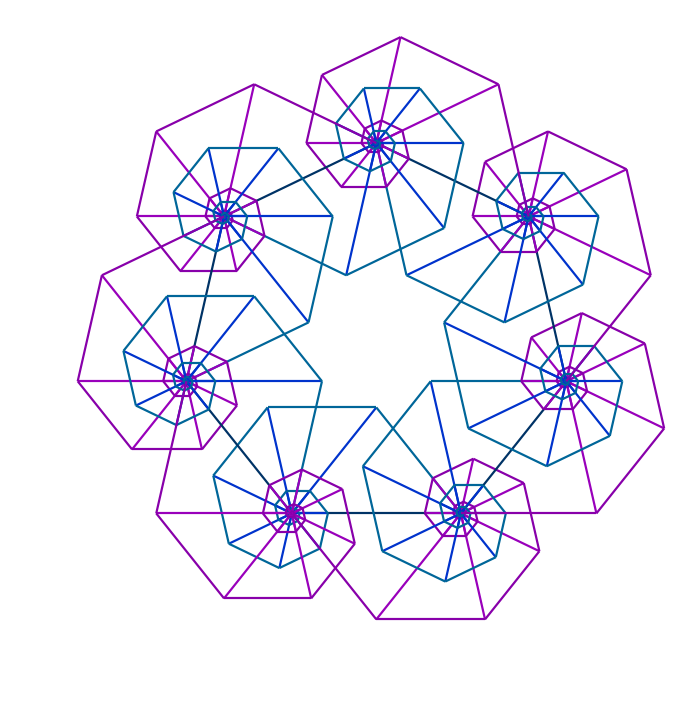

In [127]:

def minusv( v1, v2 ) :
    h1, h2 = v1
    h3, h4 = v2
    return ( h1-h3, h2-h4 )


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_xlim(-8,12)
ax.set_ylim(-5,15)
ax.axis('off')

def segment( p1, p2, color='#007799' ):
    codes = [ Path.MOVETO, Path.LINETO ]
    verts = [ skewRender( p1 ), skewRender( p2 ) ]
    path = mpath.Path( verts, codes )
    ax .add_patch( mpatches.PathPatch( path, facecolor='none', edgecolor=color, linewidth=2.2 ) )
    
p0 = origin
p1 = ( sigma, zero )
p4 = ( zero, sigma*sigma )

def fractal( v1, v2, count, spiralColor ):
    if count <= 0:
        return
    apex = rotate( scale( rho_over_sigma, v2, v1 ), v1 )
    shoulder_factor = ( rho + sigma_inv*rho_inv ) * sigma_inv
    scaled = scale( shoulder_factor, v2, v1 )
    shoulder = rotaten( 4, scaled, v1 )
    shoulder = scale( -1, shoulder, v1 )
    if count > 100:
        segment( v1, apex, color='#00aa00' )
        segment( v1, shoulder, color='#00aa00' )
    segment( apex, shoulder, spiralColor )
    segment( v2, shoulder, spiralColor )
    fractal( v1, apex, count-1, spiralColor )

def fractal_simple( v1, v2, count, spiralColor, rayColor ):
    if count <= 0:
        return
    apex = rotate( scale( rho_over_sigma, v2, v1 ), v1 )
    segment( v1, apex, rayColor )
    segment( v2, apex, spiralColor )
    fractal_simple( v1, apex, count-1, spiralColor, rayColor )

left = origin
right = ( sigma*sigma, zero )
for i in range(7):
    segment( left, right, '#003366' )
    fractal_simple( left, right, 25, '#006699', '#0033cc' )
    fractal_simple( right, left, 25, '#8800aa', '#9900bb' )
    newleft = right
    right = plusv( rotate( right, left ), minusv( right, left ) )
    left = newleft

fig.savefig( "heptanautiloid.pdf" )

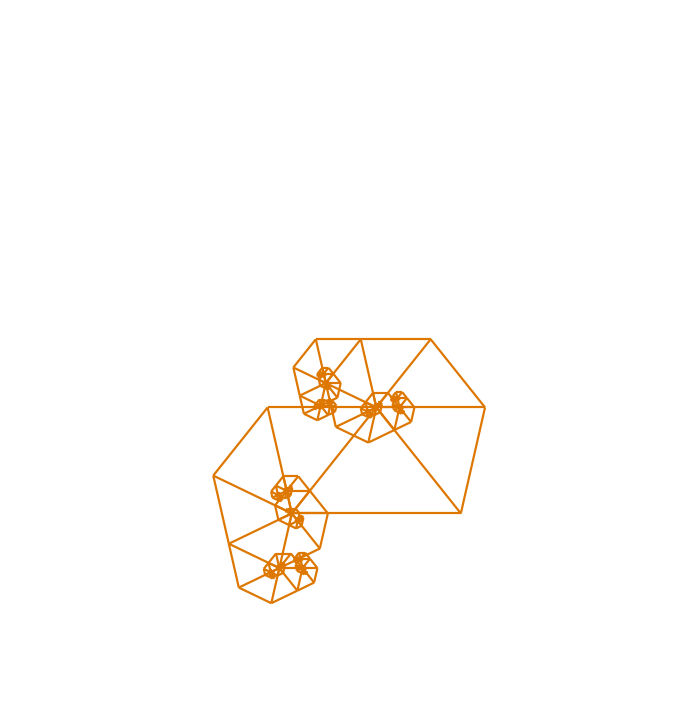

In [126]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_xlim(-8,12)
ax.set_ylim(-5,15)
ax.axis('off')

def brancher( v1, v2, count ):
    if count <= 0:
        return
    segment( v1, v2, '#dd7700' )
    apex = rotate( scale( rho_over_sigma, v2, v1 ), v1 )
    brancher( v1, apex, count-1 )
    if count % 4 == 0:
        brancher( apex, v2, count-1 )
    else:
        segment( apex, v2, '#dd7700' )

left = origin
right = ( sigma*sigma, zero )
brancher( left, right, 20 )